Take the results of synthetic_classes.py. Plot the histograms of error values of the training and test classes to evaluate the interclass separation and hence the performance of the algorithm.

In [113]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math
from collections import Counter
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import segment_cluster as sc
import importlib
importlib.reload(sc)
np.random.seed(0)
from scipy.stats import zscore
import time


In [106]:
#load the validation results and the hyperparameter values used; order/indexing of values matters
results_file="new_20190617_2comparenocopy.csv"
k_clusters=[10, 50, 100, 200]
seg_lens=[10, 50, 100,150,200]

#"normal"/training lightcurves
rho_file=np.loadtxt("data/synthetic_rhos_v2.csv", delimiter=',')
#"outlier"/test lightcurves
outlier_file="data/flats.csv"

sine_file=np.loadtxt(outlier_file, delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))),test_size=0.25, random_state=0)

#create a directory for the plots
results_dir=os.getcwd()+"/"+results_file.split(".")[0]
os.system("mkdir {}".format(results_dir))

0

In [125]:
import segment_cluster as sc
importlib.reload(sc)

process_t0 = time.process_time()
real_t0 = time.time()

all_train_segments=[]
for rho in rho_file:
    train_segments=sc.segmentation(rho, 200, 5, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)

print("Finished, elapsed time: {}s".format(time.time() - real_t0)+", total CPU time: {}s".format(time.process_time()-process_t0))

Finished, elapsed time: 0.18844985961914062s, total CPU time: 0.18884104799963097s


In [126]:
import segment_cluster_scaled as sc
importlib.reload(sc)

process_t0 = time.process_time()
real_t0 = time.time()

all_train_segments=[]
for rho in rho_file:
    train_segments=sc.segmentation(rho, 200, 5, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)

print("Finished, elapsed time: {}s".format(time.time() - real_t0)+", total CPU time: {}s".format(time.process_time()-process_t0))

Finished, elapsed time: 0.3638162612915039s, total CPU time: 0.3644854859994666s


In [97]:
counts1 = sc.analyse("new_20190617.csv", k_clusters, seg_lens, save_histograms=True, save_grid=True)


In [100]:
counts1[1]

array([[  0.,  10.,  50., 100., 150., 200.],
       [ 10., 109.,  65., 209., 203., 229.],
       [ 50., 148.,   6.,  98., 174., 228.],
       [100.,  94.,   2.,  36., 129., 209.],
       [200.,  38.,   1.,  19.,  96., 201.]])

In [94]:
counts = sc.analyse("new_20190617_2comparenocopy.csv", k_clusters, seg_lens, save_histograms=True, save_grid=True)


array([[  0.,  10.,  50., 100., 150., 200.],
       [ 10., 201., 228., 203., 232., 232.],
       [ 50., 231., 198., 212., 250., 249.],
       [100., 233.,  18., 248., 202., 232.],
       [200., 215.,   9.,  90., 233., 245.]])

In [99]:
counts[1]

array([[  0.,  10.,  50., 100., 150., 200.],
       [ 10., 121.,  54., 206., 219., 182.],
       [ 50., 171.,   6., 121., 181., 213.],
       [100., 122.,   1.,  26., 139., 227.],
       [200.,  99.,   1.,  26.,  90., 168.]])

no. clusters:  10 segment length:  10
Mean rho error: 	 0.14045963970315495 Max rho error:  0.5173103749976236


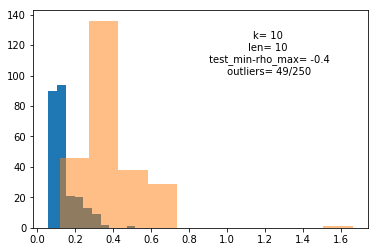

Mean test error: 	 0.37700001476562767
Min test-max rho error:  -0.39889218481586436
no. misclassified observations:  201

no. clusters:  10 segment length:  50
Mean rho error: 	 0.38926782910678664 Max rho error:  1.2841572048082806


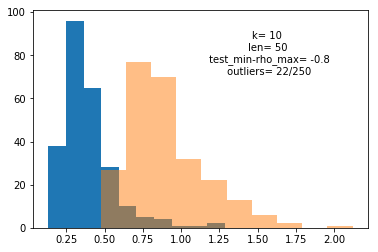

Mean test error: 	 0.8983748737593491
Min test-max rho error:  -0.8110725767963727
no. misclassified observations:  228

no. clusters:  10 segment length:  100
Mean rho error: 	 0.8437646333704829 Max rho error:  1.8635057348416622


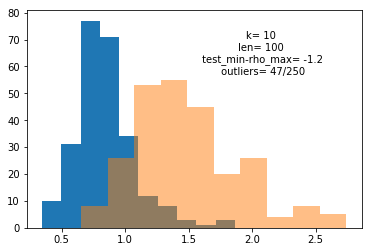

Mean test error: 	 1.4869176392072614
Min test-max rho error:  -1.2083666581935129
no. misclassified observations:  203

no. clusters:  10 segment length:  150
Mean rho error: 	 1.1594117826236703 Max rho error:  2.3960313815099377


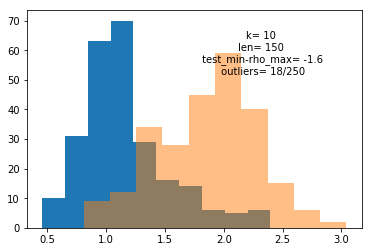

Mean test error: 	 1.8589089873712874
Min test-max rho error:  -1.5889934504452432
no. misclassified observations:  232

no. clusters:  10 segment length:  200
Mean rho error: 	 1.2979228283534519 Max rho error:  2.7466587336974326


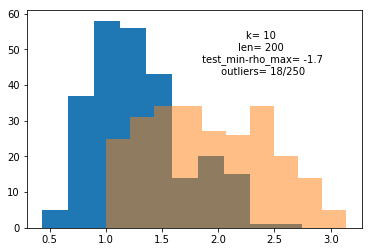

Mean test error: 	 1.911568973222131
Min test-max rho error:  -1.74091647948497
no. misclassified observations:  232

no. clusters:  50 segment length:  10
Mean rho error: 	 0.05389438925340838 Max rho error:  0.326636935544368


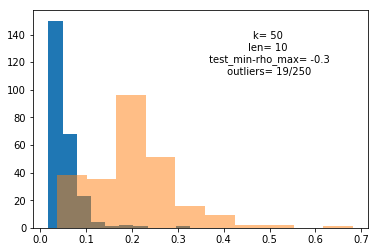

Mean test error: 	 0.20421765850727427
Min test-max rho error:  -0.2890641256287117
no. misclassified observations:  231

no. clusters:  50 segment length:  50
Mean rho error: 	 0.18409009338394813 Max rho error:  0.8260417500827609


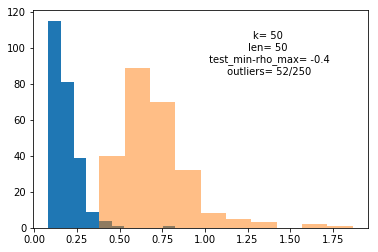

Mean test error: 	 0.7113057983160526
Min test-max rho error:  -0.44430815893482134
no. misclassified observations:  198

no. clusters:  50 segment length:  100
Mean rho error: 	 0.4498575091330615 Max rho error:  1.2070309368067456


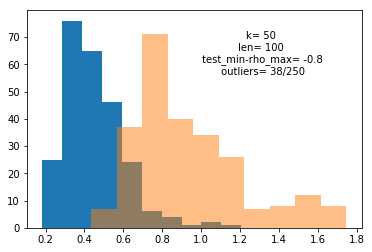

Mean test error: 	 0.9341766282770829
Min test-max rho error:  -0.77268912704303
no. misclassified observations:  212

no. clusters:  50 segment length:  150
Mean rho error: 	 0.6382537271886938 Max rho error:  2.5449072120689857


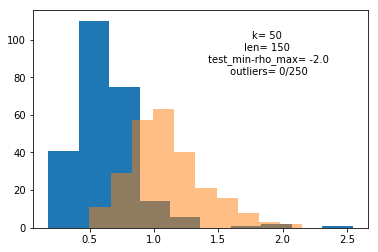

Mean test error: 	 1.104770411986896
Min test-max rho error:  -2.04599760909141
no. misclassified observations:  250

no. clusters:  50 segment length:  200
Mean rho error: 	 0.7522595274128775 Max rho error:  2.3417451885454166


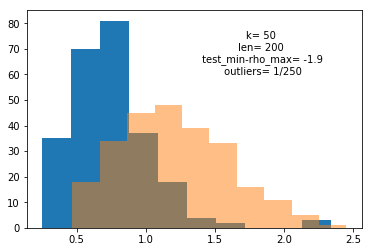

Mean test error: 	 1.2064337848003825
Min test-max rho error:  -1.8738335685224385
no. misclassified observations:  249

no. clusters:  100 segment length:  10
Mean rho error: 	 0.036953827392465895 Max rho error:  0.28896198525952677


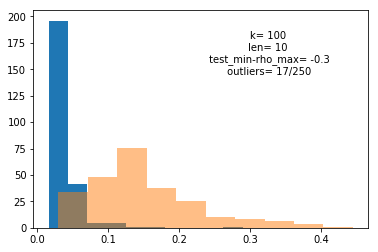

Mean test error: 	 0.14970788719889175
Min test-max rho error:  -0.25963097986017886
no. misclassified observations:  233

no. clusters:  100 segment length:  50
Mean rho error: 	 0.14225943807734875 Max rho error:  0.45495839047456593


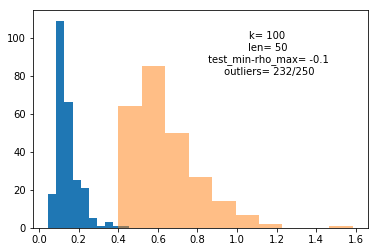

Mean test error: 	 0.635490339748832
Min test-max rho error:  -0.054347821331771906
no. misclassified observations:  18

no. clusters:  100 segment length:  100
Mean rho error: 	 0.33629675484655636 Max rho error:  1.2593995628069636


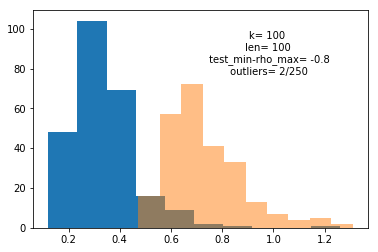

Mean test error: 	 0.7321625039894061
Min test-max rho error:  -0.786638132089001
no. misclassified observations:  248

no. clusters:  100 segment length:  150
Mean rho error: 	 0.49864327254410035 Max rho error:  1.2650229117959322


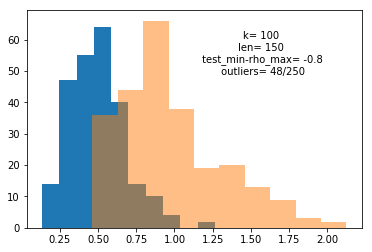

Mean test error: 	 0.9774086428124861
Min test-max rho error:  -0.8020331815122488
no. misclassified observations:  202

no. clusters:  100 segment length:  200
Mean rho error: 	 0.5790570676333288 Max rho error:  1.569619798018002


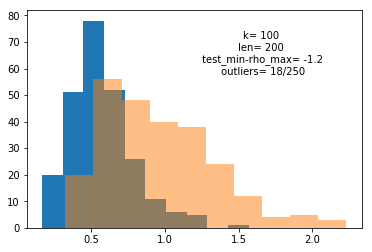

Mean test error: 	 0.9652001249193907
Min test-max rho error:  -1.245009118474412
no. misclassified observations:  232

no. clusters:  200 segment length:  10
Mean rho error: 	 0.02522825621785101 Max rho error:  0.21833630510529017


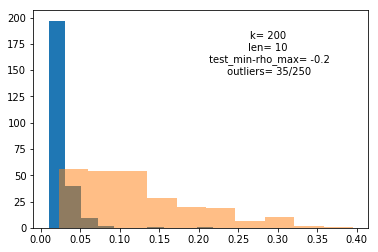

Mean test error: 	 0.12530209778743956
Min test-max rho error:  -0.19512317129956255
no. misclassified observations:  215

no. clusters:  200 segment length:  50
Mean rho error: 	 0.1165978528325783 Max rho error:  0.3950959429337272


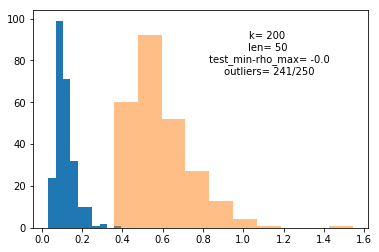

Mean test error: 	 0.5882520216514335
Min test-max rho error:  -0.03841932140456994
no. misclassified observations:  9

no. clusters:  200 segment length:  100
Mean rho error: 	 0.2523059970336498 Max rho error:  0.5987266576268719


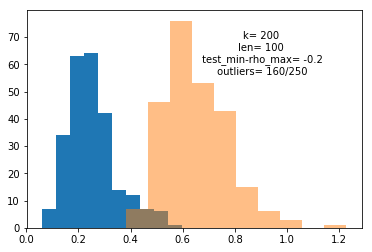

Mean test error: 	 0.6514993050692444
Min test-max rho error:  -0.2161377244303876
no. misclassified observations:  90

no. clusters:  200 segment length:  150
Mean rho error: 	 0.3929272018903359 Max rho error:  1.0904630944643408


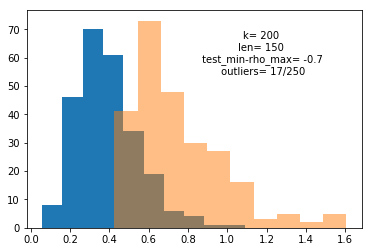

Mean test error: 	 0.7523901239063281
Min test-max rho error:  -0.6650955040150104
no. misclassified observations:  233

no. clusters:  200 segment length:  200
Mean rho error: 	 0.46603299194730335 Max rho error:  1.4329256271373514


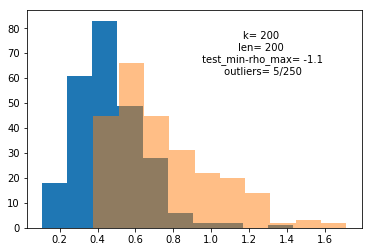

Mean test error: 	 0.7503296123687735
Min test-max rho error:  -1.0556097828269928
no. misclassified observations:  245



In [89]:
#draw histograms of the error values of training and test light curve reconstructions, for the different sets of hyperparameters.
#Larger separation between the blue and orange histograms means a better functioning algorithm.
results=np.loadtxt(results_file, dtype=float, delimiter=",")
outliers=np.zeros((len(k_clusters)+1,len(seg_lens)+1))
outliers[1:,0]=np.array(k_clusters).T
outliers[0,1:]=np.array(seg_lens)
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
#         plt.xlim([0,2.5])
#         plt.ylim([0,100])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.savefig("{}.png".format(results_dir+"/"+"k{}_len{}".format(k_cluster, seg_len)))
        plt.show()
        outliers[k_id+1,len_id+1]=250-counter
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        print()
np.savetxt("{}/grid_search.csv".format(results_dir), outliers.astype(int), delimiter=",") 

In [90]:
outliers.astype(int)

array([[  0,  10,  50, 100, 150, 200],
       [ 10,  49,  22,  47,  18,  18],
       [ 50,  19,  52,  38,   0,   1],
       [100,  17, 232,   2,  48,  18],
       [200,  35, 241, 160,  17,   5]])

Take the results of synthetic_classes.py. Extract the indices of X best/worst reconstructions of training and test classes to understand how to improve the algorithm; how to error of reconstruction of the different classes more different. 

In [40]:
results=np.loadtxt(results_file, dtype=float, delimiter=",")
#structure of the lines in the file: cluster number index, segment length index, training=0 test=1, lightcurve index, error)

extract_x=3

output=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        output.append(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        output.append("worst/best training, wort/best test")
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        sorted_train=train[train[:,-1].argsort()]
        worst_train=sorted_train[-extract_x:,3].astype(int)
        best_train=sorted_train[0:extract_x,3].astype(int)        
        
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        sorted_test=test[test[:,-1].argsort()]
        worst_test=sorted_test[-extract_x:,3].astype(int)
        best_test=sorted_test[0:extract_x,3].astype(int)
        output.append(np.vstack((worst_train,best_train,worst_test,best_test)))

In [41]:
output

[('no. clusters: ', 10, 'segment length: ', 10),
 'worst/best training, wort/best test',
 array([[523, 418, 299],
        [996, 693, 200],
        [144,  14, 101],
        [185, 104, 147]]),
 ('no. clusters: ', 10, 'segment length: ', 50),
 'worst/best training, wort/best test',
 array([[255, 826, 494],
        [583, 996, 496],
        [110, 184, 144],
        [147,  84, 232]]),
 ('no. clusters: ', 10, 'segment length: ', 100),
 'worst/best training, wort/best test',
 array([[494, 576, 790],
        [500, 654, 817],
        [ 77, 156, 216],
        [185, 136, 128]]),
 ('no. clusters: ', 10, 'segment length: ', 150),
 'worst/best training, wort/best test',
 array([[ 18, 494, 364],
        [989, 362, 736],
        [ 55,  77,  30],
        [127, 104,  85]]),
 ('no. clusters: ', 10, 'segment length: ', 200),
 'worst/best training, wort/best test',
 array([[940, 826, 351],
        [883, 989, 283],
        [198,  58,   4],
        [ 14,   6, 123]]),
 ('no. clusters: ', 50, 'segment length: '

take the ids of the best and worst reconstructions, repeat and plot 

('no. clusters: ', 10, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


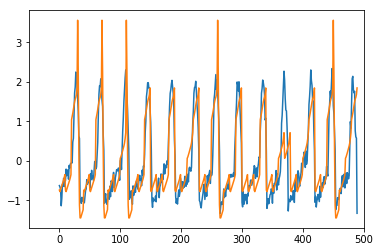

0.35488241431862316


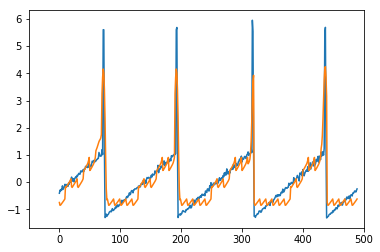

0.37674389330595576


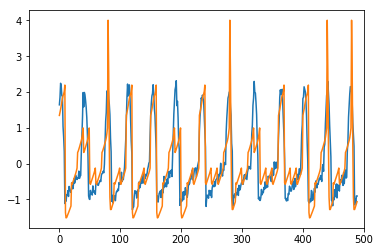

0.5079036842969172
Best reconstructions of outlier lightcurves


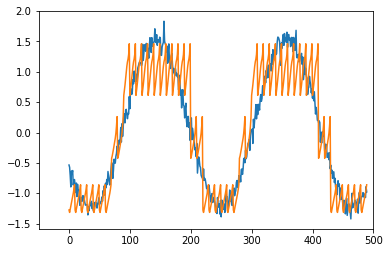

0.17219811903155088


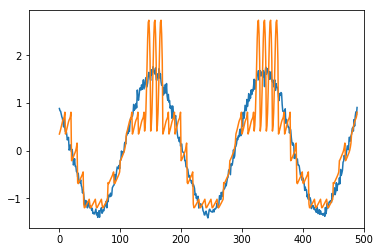

0.1879982364058784


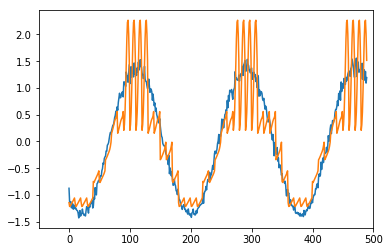

0.20059048197287682
('no. clusters: ', 10, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


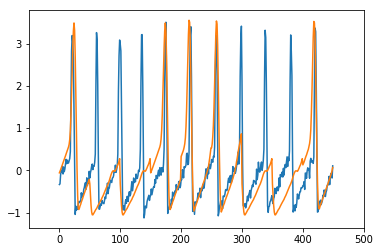

0.9855800017088823


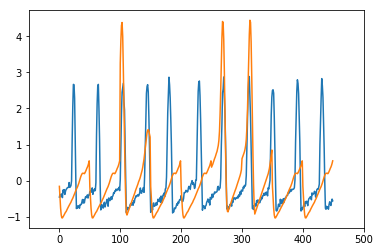

1.1060321901873365


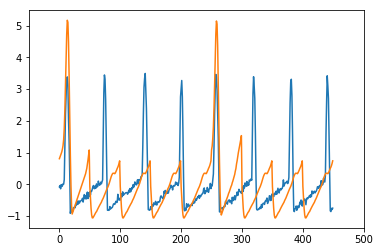

1.1413860673189165
Best reconstructions of outlier lightcurves


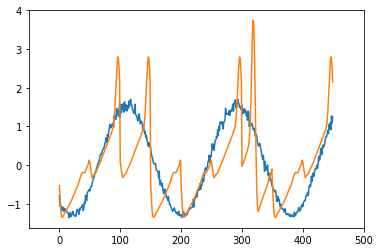

0.7239586969843317


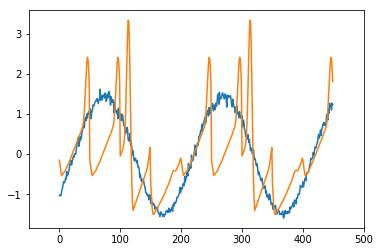

0.7978887042192019


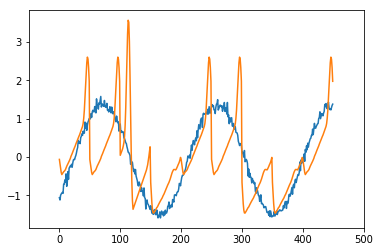

0.7994046785520439
('no. clusters: ', 10, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


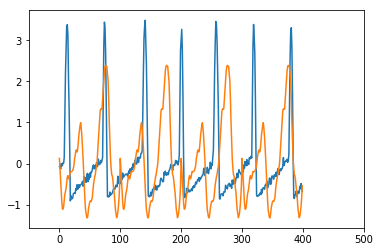

1.8517460485848596


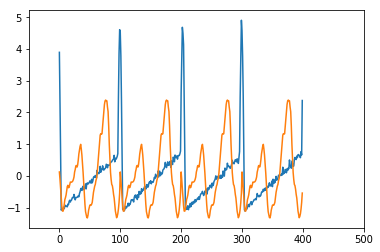

1.940541586345336


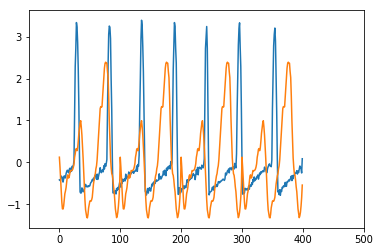

2.0021722829781172
Best reconstructions of outlier lightcurves


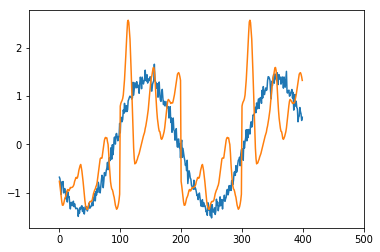

0.6689539891275069


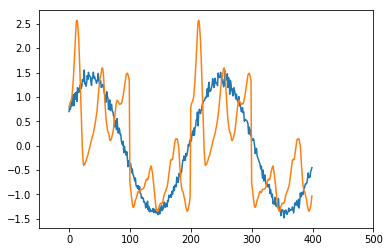

0.6861973995955546


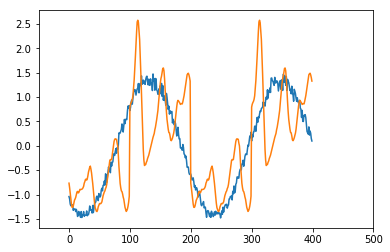

0.7275506392194118
('no. clusters: ', 10, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


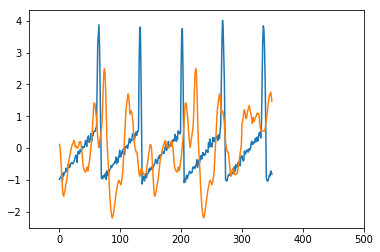

1.7656050470222937


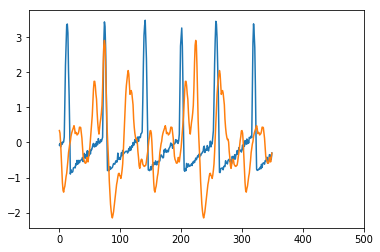

1.8680396874095355


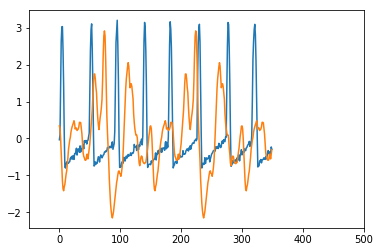

2.0939659601118468
Best reconstructions of outlier lightcurves


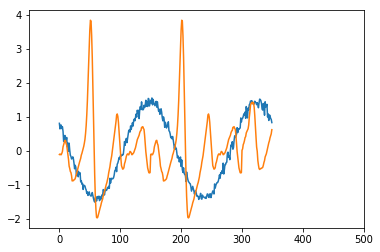

1.7860781698713344


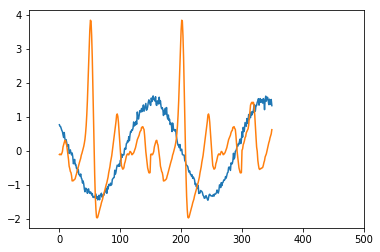

1.8258965567892262


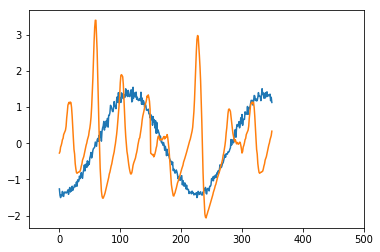

1.8295186458693917
('no. clusters: ', 10, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


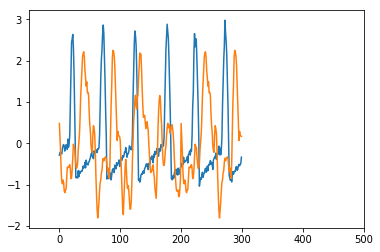

2.342426809574027


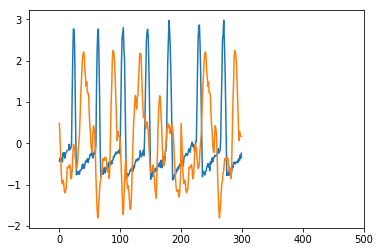

2.390155327152119


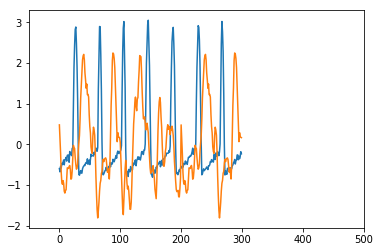

2.410936128765238
Best reconstructions of outlier lightcurves


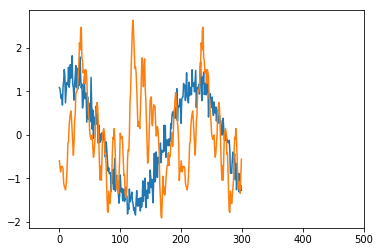

1.6791095320888785


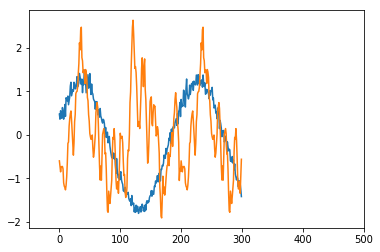

1.697580659410312


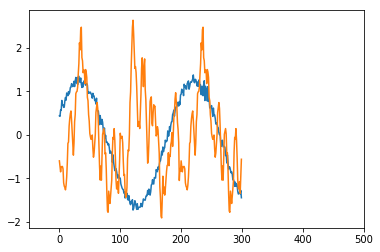

1.6996761718306166
('no. clusters: ', 50, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


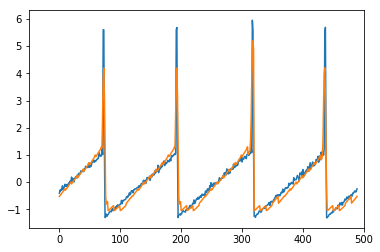

0.18902270517261244


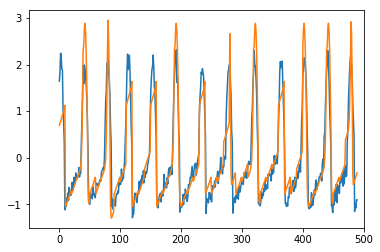

0.2155342997714084


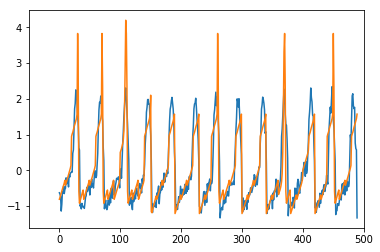

0.32974535197953353
Best reconstructions of outlier lightcurves


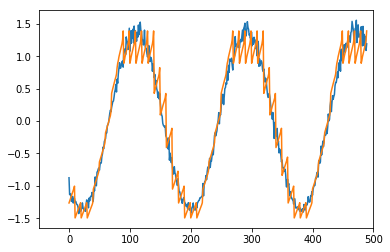

0.045003868207214


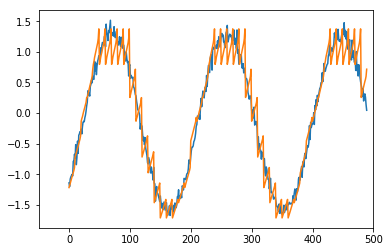

0.04860260618262489


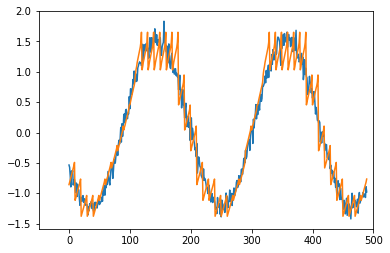

0.04963007511807402
('no. clusters: ', 50, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


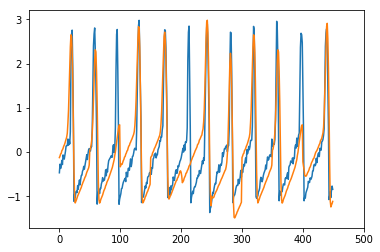

0.43844665073514205


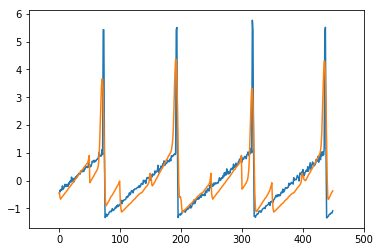

0.46703052964067465


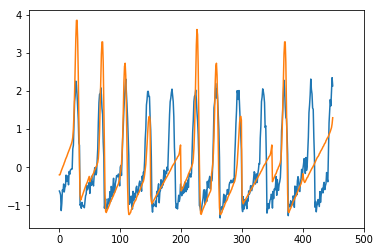

0.6166389138024562
Best reconstructions of outlier lightcurves


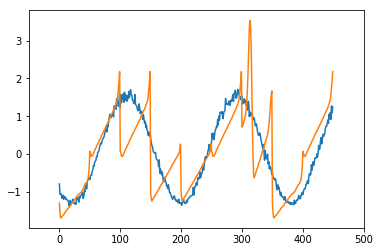

0.47271528206995317


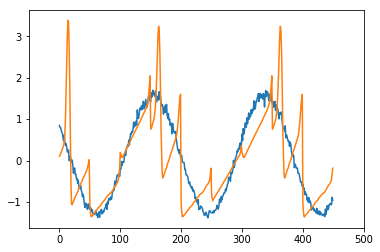

0.4935140180922569


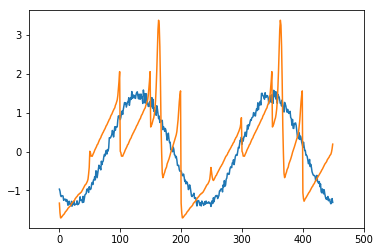

0.5721517827345226
('no. clusters: ', 50, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


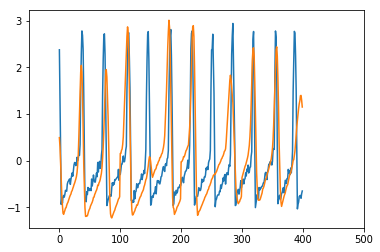

0.8743614166610957


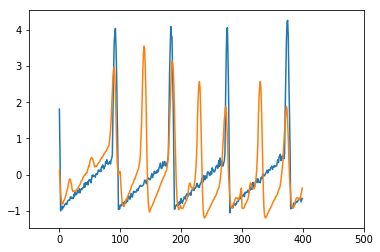

0.9177770376969662


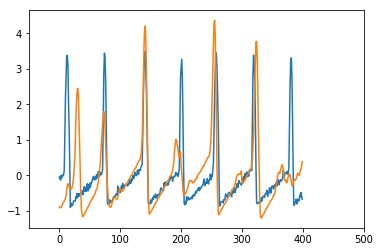

1.0575838184748023
Best reconstructions of outlier lightcurves


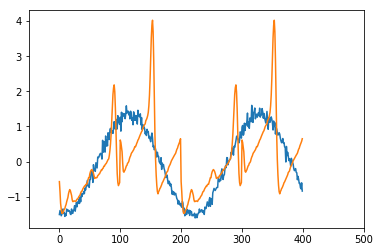

0.8094230903331814


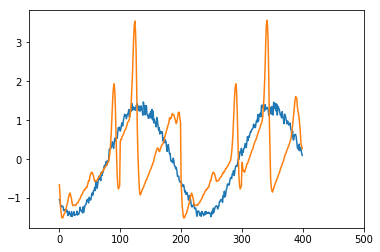

0.8646082078871177


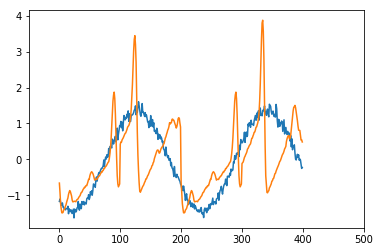

0.8882127818106857
('no. clusters: ', 50, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


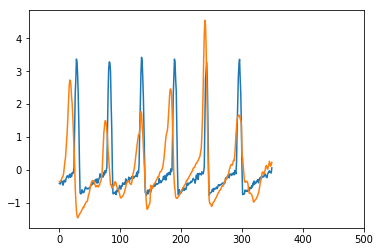

1.3035959897410683


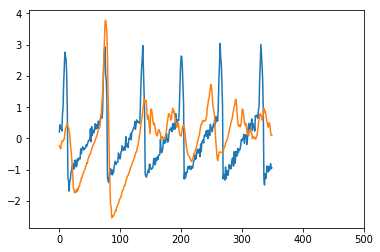

1.339324439470279


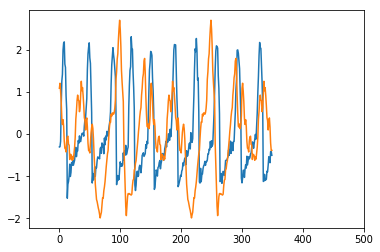

2.0466964438041355
Best reconstructions of outlier lightcurves


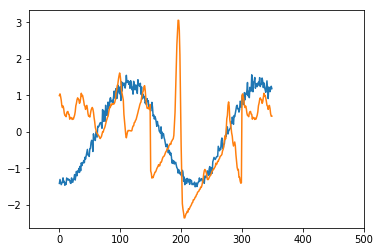

1.2197176563886676


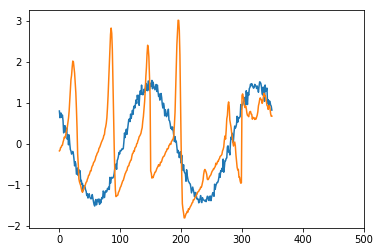

1.2557164217237018


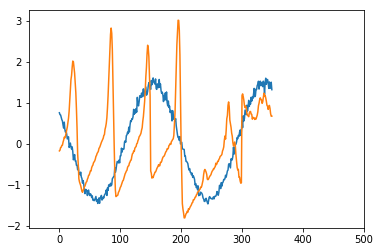

1.299241701843604
('no. clusters: ', 50, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


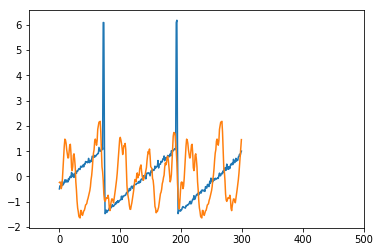

1.79048250210553


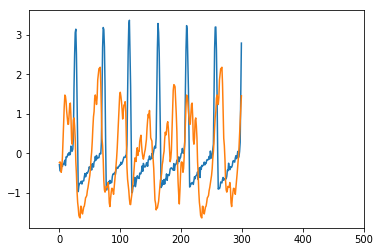

1.9253973005035951


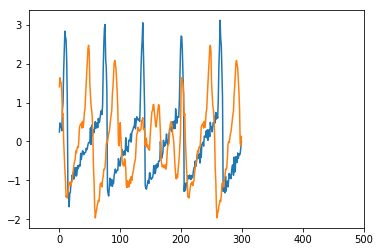

2.2079217403721487
Best reconstructions of outlier lightcurves


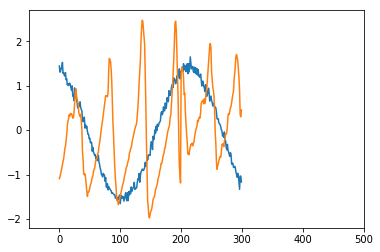

1.7488572529458877


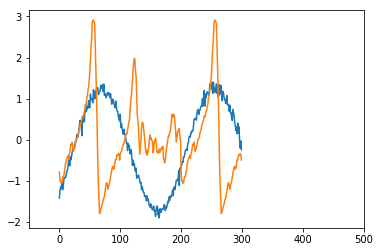

1.821758345437997


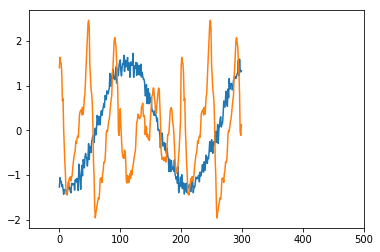

1.8261712275242772
('no. clusters: ', 100, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


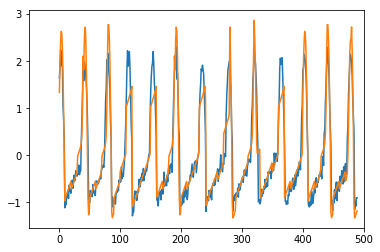

0.1475411970268821


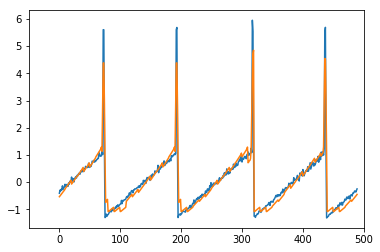

0.15005620691812965


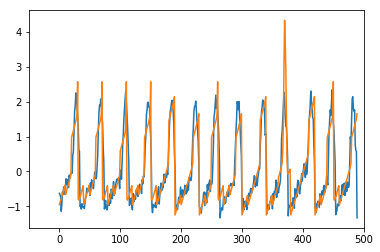

0.333413425966703
Best reconstructions of outlier lightcurves


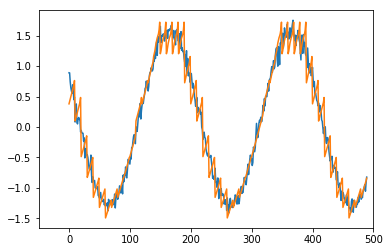

0.03628244074172688


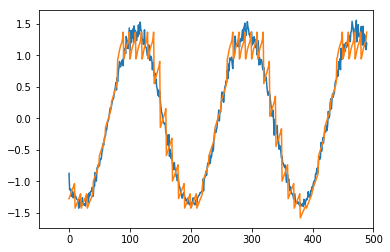

0.037469057457127364


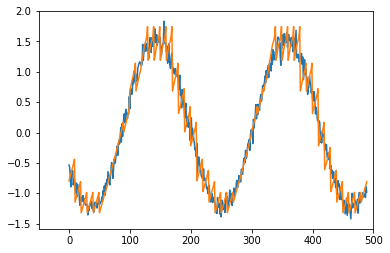

0.038084208609361146
('no. clusters: ', 100, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


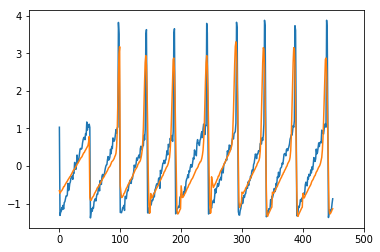

0.3757061284346714


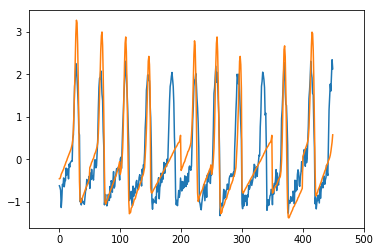

0.43123546859561973


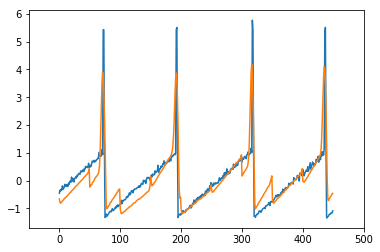

0.4392430741019278
Best reconstructions of outlier lightcurves


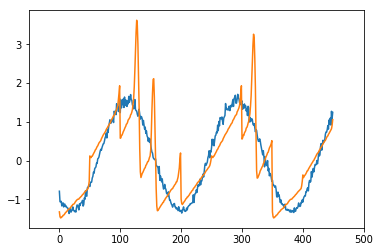

0.35410379602663766


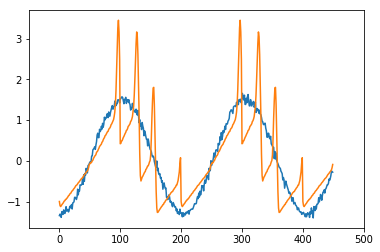

0.4296078121087428


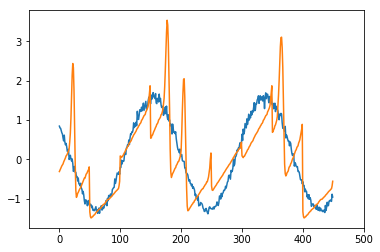

0.446503077141496
('no. clusters: ', 100, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


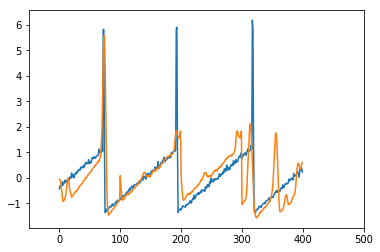

0.8809405367344965


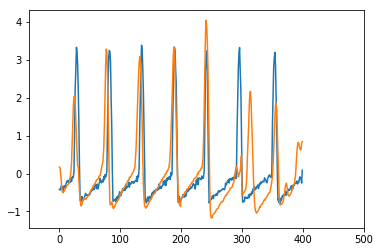

0.8936747675286947


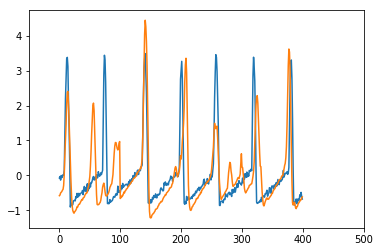

0.9883520347407658
Best reconstructions of outlier lightcurves


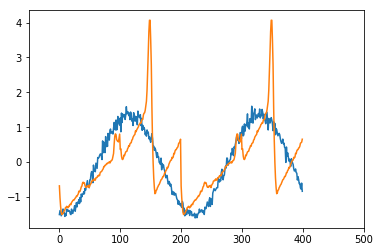

0.6437088108800063


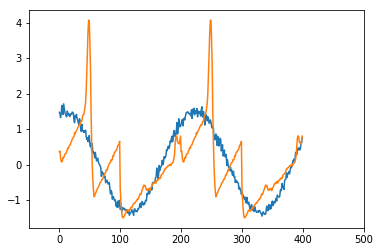

0.6631323693936122


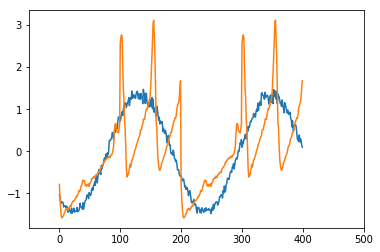

0.6712579496556675
('no. clusters: ', 100, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


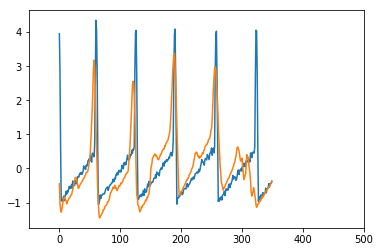

0.9962094296037388


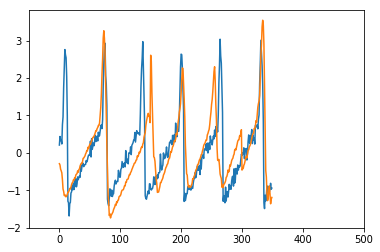

1.0692615196442057


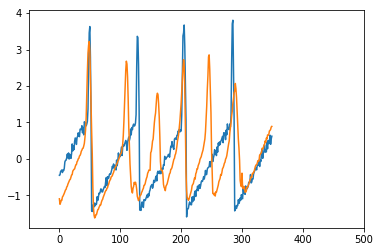

1.0897275891559701
Best reconstructions of outlier lightcurves


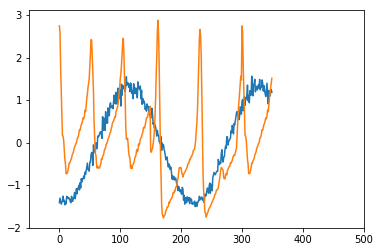

1.4866600992435945


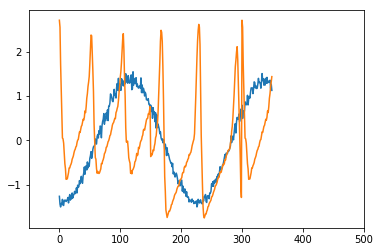

1.5565948379978856


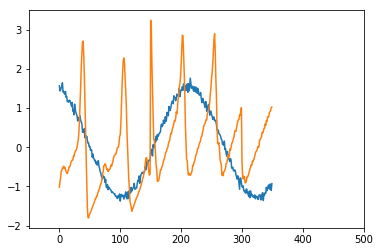

1.589644087884419
('no. clusters: ', 100, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


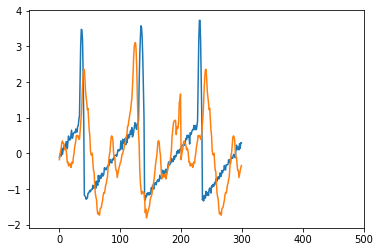

1.6182133619169887


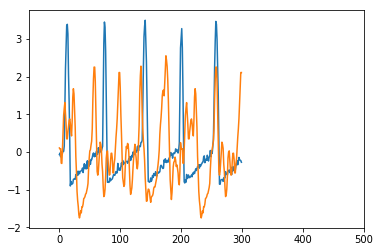

1.7926237660593343


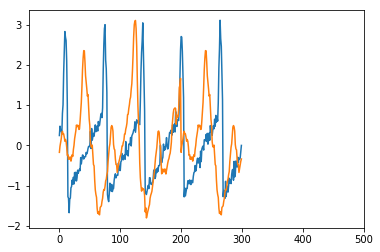

2.077420315878005
Best reconstructions of outlier lightcurves


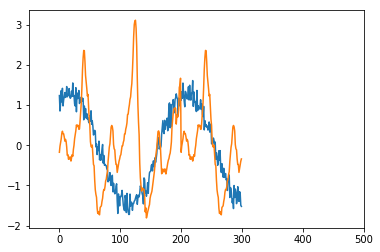

1.6287187941069226


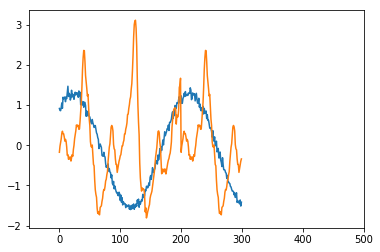

1.632296559021612


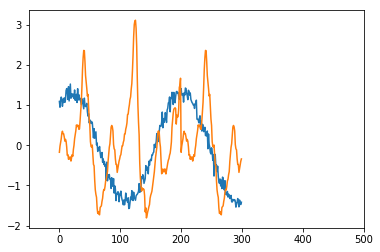

1.63408790213373
('no. clusters: ', 200, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


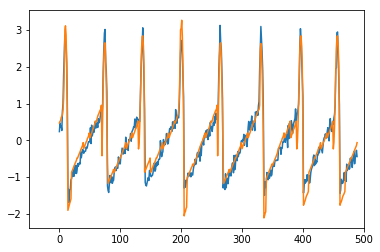

0.08345806151891326


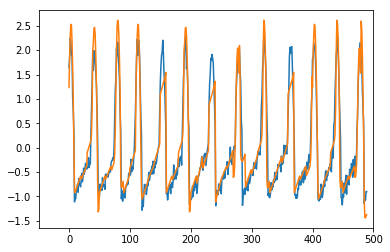

0.11497663661524056


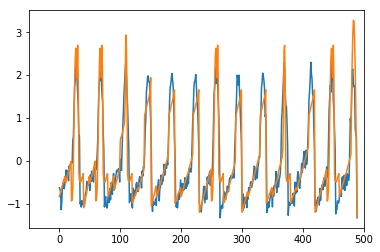

0.22338464542947906
Best reconstructions of outlier lightcurves


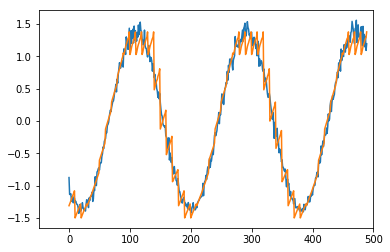

0.027024318919969103


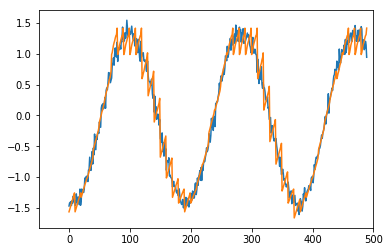

0.030441200225117267


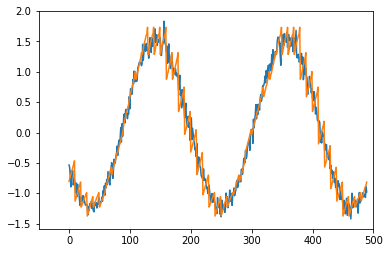

0.03184783318548629
('no. clusters: ', 200, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


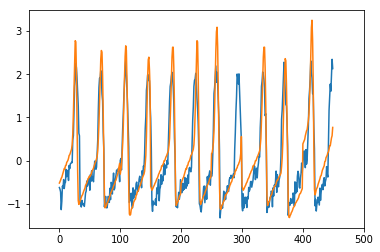

0.29702862076035774


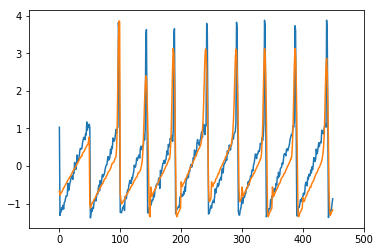

0.35264605245457226


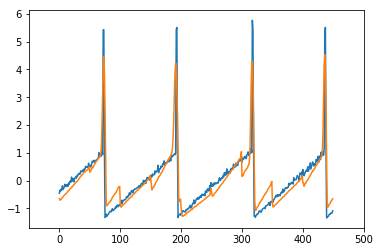

0.3540305954460919
Best reconstructions of outlier lightcurves


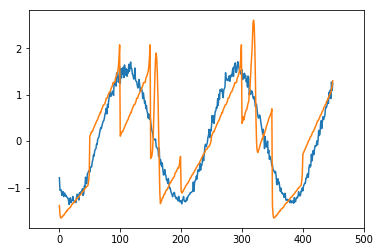

0.3123783368197741


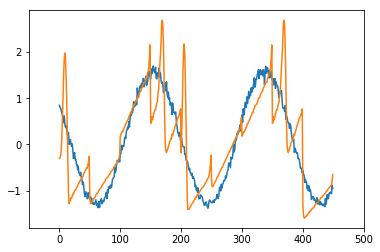

0.3608596291011333


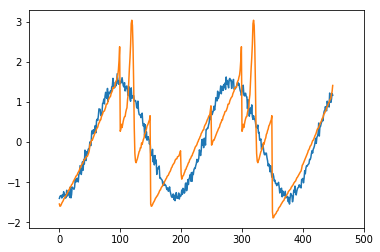

0.3707403449673786
('no. clusters: ', 200, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


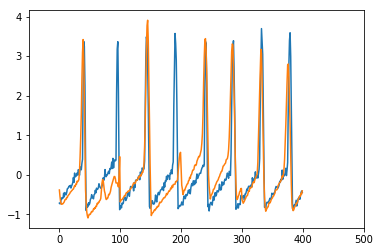

0.6055052202183382


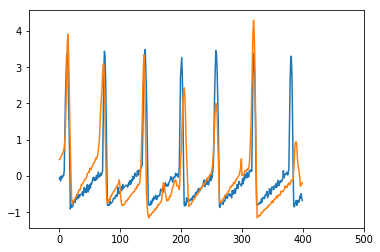

0.6246312131466781


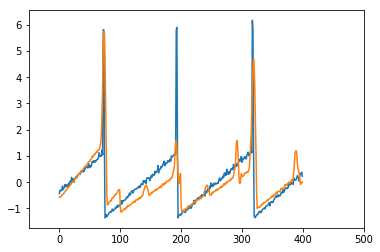

0.7523862676386759
Best reconstructions of outlier lightcurves


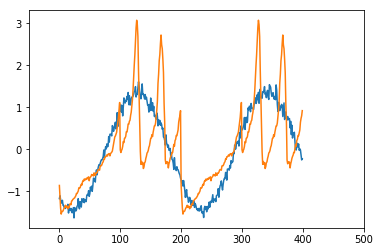

0.5747001572300676


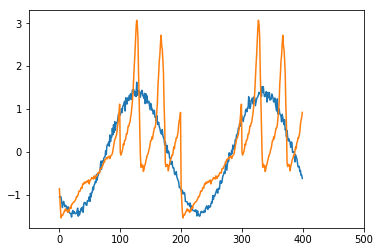

0.5925791227092467


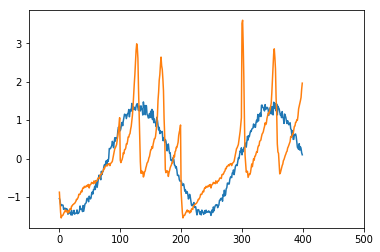

0.6013710156105746
('no. clusters: ', 200, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


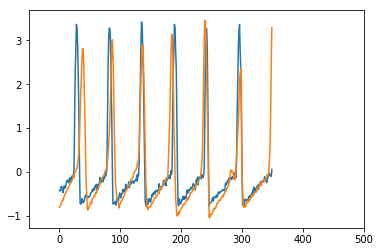

0.9270392877975587


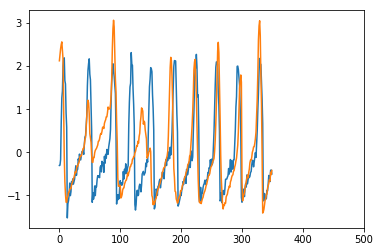

0.946193686847363


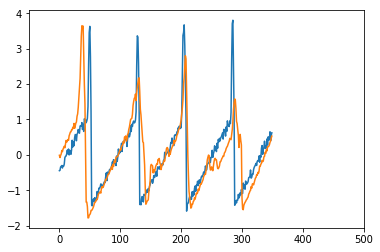

1.0133562789788717
Best reconstructions of outlier lightcurves


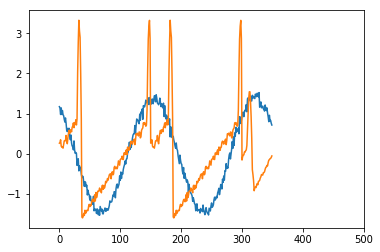

1.0823656265127695


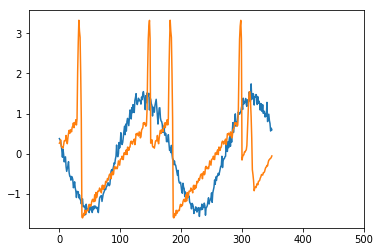

1.1095651534470679


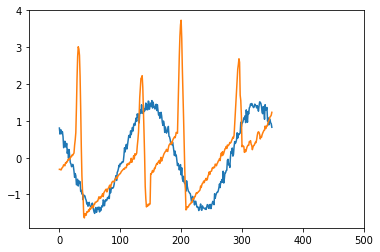

1.161809789149017
('no. clusters: ', 200, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


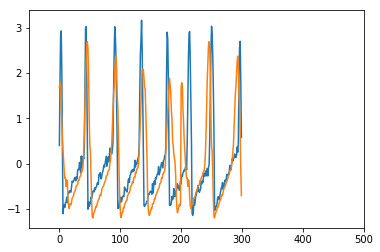

1.0789250862578887


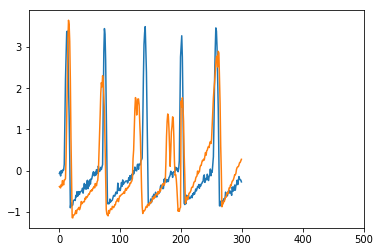

1.0793110237635728


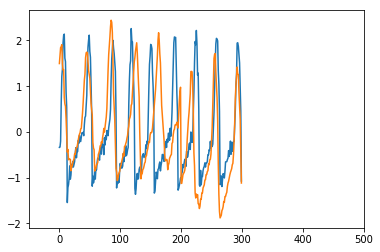

1.2859426255540953
Best reconstructions of outlier lightcurves


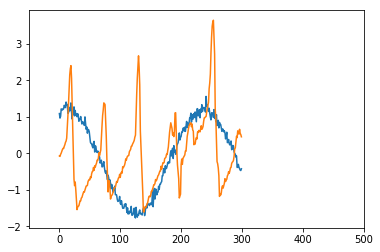

1.4779230371713834


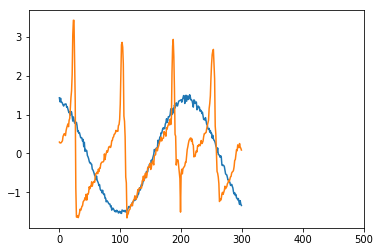

1.5029868376585618


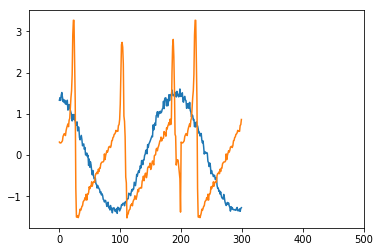

1.5848475440693734


In [44]:
plot_worst_training=True
plot_best_training=False
plot_worst_test=False
plot_best_test=True

hyperparameter_set=0
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(all_train_segments)
        
        ids=output[int((hyperparameter_set+1)*3 -1)]
        def plot_reco(lc):
            valid_segments= sc.segmentation(lc, seg_len, seg_len , time_stamps=False)
            reco = sc.reconstruct(valid_segments, lc, cluster, rel_offset=False, seg_slide=seg_len)

            reco[0:-seg_len]=zscore(reco[0:-seg_len])
            lc_expected=zscore(np.copy((lc[0:-seg_len])))

#             lc_error=np.power(np.e,np.log(lc_expected)*0.5+1.0397207708265923)
            error = np.mean(((reco[0:-seg_len]-lc_expected))**2.0)
        
            plt.plot(lc_expected)
            plt.plot(reco[0:-seg_len])
#             plt.ylim([0,14000])
            plt.xlim([-50,500])
            plt.show()
            print(error)
            return
        
        if plot_worst_training is True:
            print("Worst reconstructions of ordinary lightcurves")
            for lc_id in ids[0]:
                lc=rho_file[lc_id]
                plot_reco(lc)
        
        if plot_best_training is True:
            print("Best reconstructions of ordinary lightcurves")
            for lc_id in ids[1]:
                lc=rho_file[lc_id]
                plot_reco(lc)
        if plot_worst_test is True:
            print("Worst reconstructions of outlier lightcurves")
            for lc_id in ids[2]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        if plot_best_test is True:
            print("Best reconstructions of outlier lightcurves")
            for lc_id in ids[3]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        
        hyperparameter_set+=1

[]

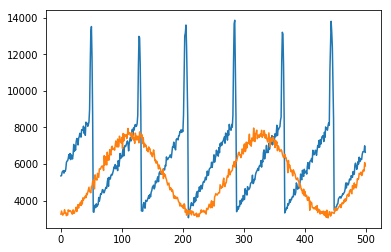

In [46]:
plt.plot(rho_file[814])
plt.plot(sine_file[160])
plt.plot()